# Analyzing Peoples Opinion on Brexit Using Twitter Data

## 1. Loading Libraries and Data

In [1]:
import pandas as pd
import re # for regular expressions 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from numpy.random import RandomState

%matplotlib inline

Reading the CSV file extracted from R

In [2]:
df = pd.read_csv("tweetextract.csv",encoding = "ISO-8859-1")
rng = RandomState()

## 2. Text Pre-Processing and Cleaning

In [3]:
train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

In [5]:
train.shape, test.shape

((140000, 17), (60000, 17))

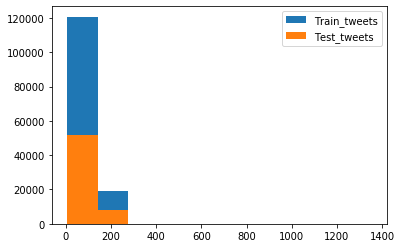

In [6]:
length_train = train['text'].str.len()
length_test = test['text'].str.len()

plt.hist(length_train, bins=10, label="Train_tweets")
plt.hist(length_test, bins=10, label="Test_tweets")
plt.legend()
plt.show()


### Data Cleaning

In [7]:
combi = train.append(test, ignore_index=True)
combi.shape

(200000, 17)

User-defined function to remove unwanted text patterns from the tweets.

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

2.1 Removing the URL (https://)

In [30]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "https://t.co/[\w]*") 
combi.head()

Unnamed: 0  \
0       68026   
1       90260   
2       92535   
3      132783   
4      132065   

                                                                                                                                           text  \
0  @PeterDain1 That is what I keep saying. The Conservative remain party doesn't intend to deliver Brexit. We need a h
 https://t.co/rz1Pwl3hzs   
1                                       Brexit Party Support Collapses As Working Class Move To Back Boris https://t.co/z2eZJjsDmn via @YouTube   
2  @Hughie1953 @BevEmans @Julieescott2 @1maggiewinter @brexitparty_uk @stellacreasy Oh, Wikipedia didnt have a proper
 https://t.co/9Ext8ZWeX8   
3  The 2016 Referendum was corrupted by dodgy russian money, foreign interference and law breaking Ms Fox, there is no
 https://t.co/BsOFe1Mm89   
4  @petercorser @tina_eager @JohnG4852 @theJeremyVine True.  But hate is not going to fix #Brexit.  In fact it is part
 https://t.co/FNlwQ82oyb   

   favorited  favoriteCount    replyToSN              created  truncated  \
0      False              6   PeterDain1  2019-11-18 11:42:38       True   
1      False              0          NaN  2019-11-17 18:31:11      False   
2      False              3   Hughie1953  2019-11-17 17:24:58       True   
3      False              4          NaN  2019-11-16 13:49:26       True   
4      False              3  petercorser  2019-11-16 14:13:21       True   

     replyToSID                   id    replyToUID  \
0  1.196390e+18  1196393272257716224  1.159457e+18   
1           NaN  1196133697038278656           NaN   
2  1.196038e+18  1196117033408245765  7.832887e+07   
3           NaN  1195700404484542464           NaN   
4  1.195682e+18  1195706423189164032  2.212806e+07   

                                                                         statusSource  \
0             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2   <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
3             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

        screenName  retweetCount  isRetweet  retweeted  longitude  latitude  \
0    CelticOracle1             7      False      False        NaN       NaN   
1    MarcThe000001             0      False      False        NaN       NaN   
2    julia_georgie             1      False      False        NaN       NaN   
3     MaisonGladys             0      False      False        NaN       NaN   
4  DemocracyCanWin             0      False      False        NaN       NaN   

                                                                                                              tidy_tweet  
0  @PeterDain1 That is what I keep saying. The Conservative remain party doesn't intend to deliver Brexit. We need a h
   
1                                       Brexit Party Support Collapses As Working Class Move To Back Boris  via @YouTube  
2  @Hughie1953 @BevEmans @Julieescott2 @1maggiewinter @brexitparty_uk @stellacreasy Oh, Wikipedia didnt have a proper
   
3  The 2016 Referendum was corrupted by dodgy russian money, foreign interference and law breaking Ms Fox, there is no
   
4  @petercorser @tina_eager @JohnG4852 @theJeremyVine True.  But hate is not going to fix #Brexit.  In fact it is part

2.2 Removing Twitter Handles (@user)

In [10]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tidy_tweet'], "@[\w]*") 
combi.head()

Unnamed: 0  \
0       68026   
1       90260   
2       92535   
3      132783   
4      132065   

                                                                                                                                           text  \
0  @PeterDain1 That is what I keep saying. The Conservative remain party doesn't intend to deliver Brexit. We need a h
 https://t.co/rz1Pwl3hzs   
1                                       Brexit Party Support Collapses As Working Class Move To Back Boris https://t.co/z2eZJjsDmn via @YouTube   
2  @Hughie1953 @BevEmans @Julieescott2 @1maggiewinter @brexitparty_uk @stellacreasy Oh, Wikipedia didnt have a proper
 https://t.co/9Ext8ZWeX8   
3  The 2016 Referendum was corrupted by dodgy russian money, foreign interference and law breaking Ms Fox, there is no
 https://t.co/BsOFe1Mm89   
4  @petercorser @tina_eager @JohnG4852 @theJeremyVine True.  But hate is not going to fix #Brexit.  In fact it is part
 https://t.co/FNlwQ82oyb   

   favorited  favoriteCount    replyToSN              created  truncated  \
0      False              6   PeterDain1  2019-11-18 11:42:38       True   
1      False              0          NaN  2019-11-17 18:31:11      False   
2      False              3   Hughie1953  2019-11-17 17:24:58       True   
3      False              4          NaN  2019-11-16 13:49:26       True   
4      False              3  petercorser  2019-11-16 14:13:21       True   

     replyToSID                   id    replyToUID  \
0  1.196390e+18  1196393272257716224  1.159457e+18   
1           NaN  1196133697038278656           NaN   
2  1.196038e+18  1196117033408245765  7.832887e+07   
3           NaN  1195700404484542464           NaN   
4  1.195682e+18  1195706423189164032  2.212806e+07   

                                                                         statusSource  \
0             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2   <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
3             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

        screenName  retweetCount  isRetweet  retweeted  longitude  latitude  \
0    CelticOracle1             7      False      False        NaN       NaN   
1    MarcThe000001             0      False      False        NaN       NaN   
2    julia_georgie             1      False      False        NaN       NaN   
3     MaisonGladys             0      False      False        NaN       NaN   
4  DemocracyCanWin             0      False      False        NaN       NaN   

                                                                                                              tidy_tweet  
0              That is what I keep saying. The Conservative remain party doesn't intend to deliver Brexit. We need a h
   
1                                               Brexit Party Support Collapses As Working Class Move To Back Boris  via   
2                                                                                   Oh, Wikipedia didnt have a proper
   
3  The 2016 Referendum was corrupted by dodgy russian money, foreign interference and law breaking Ms Fox, there is no
   
4                                                     True.  But hate is not going to fix #Brexit.  In fact it is part

2.3 Removing Punctuations, Numbers, and Special Characters

In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

Unnamed: 0  \
0       68026   
1       90260   
2       92535   
3      132783   
4      132065   

                                                                                                                                           text  \
0  @PeterDain1 That is what I keep saying. The Conservative remain party doesn't intend to deliver Brexit. We need a h
 https://t.co/rz1Pwl3hzs   
1                                       Brexit Party Support Collapses As Working Class Move To Back Boris https://t.co/z2eZJjsDmn via @YouTube   
2  @Hughie1953 @BevEmans @Julieescott2 @1maggiewinter @brexitparty_uk @stellacreasy Oh, Wikipedia didnt have a proper
 https://t.co/9Ext8ZWeX8   
3  The 2016 Referendum was corrupted by dodgy russian money, foreign interference and law breaking Ms Fox, there is no
 https://t.co/BsOFe1Mm89   
4  @petercorser @tina_eager @JohnG4852 @theJeremyVine True.  But hate is not going to fix #Brexit.  In fact it is part
 https://t.co/FNlwQ82oyb   

   favorited  favoriteCount    replyToSN              created  truncated  \
0      False              6   PeterDain1  2019-11-18 11:42:38       True   
1      False              0          NaN  2019-11-17 18:31:11      False   
2      False              3   Hughie1953  2019-11-17 17:24:58       True   
3      False              4          NaN  2019-11-16 13:49:26       True   
4      False              3  petercorser  2019-11-16 14:13:21       True   

     replyToSID                   id    replyToUID  \
0  1.196390e+18  1196393272257716224  1.159457e+18   
1           NaN  1196133697038278656           NaN   
2  1.196038e+18  1196117033408245765  7.832887e+07   
3           NaN  1195700404484542464           NaN   
4  1.195682e+18  1195706423189164032  2.212806e+07   

                                                                         statusSource  \
0             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2   <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
3             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

        screenName  retweetCount  isRetweet  retweeted  longitude  latitude  \
0    CelticOracle1             7      False      False        NaN       NaN   
1    MarcThe000001             0      False      False        NaN       NaN   
2    julia_georgie             1      False      False        NaN       NaN   
3     MaisonGladys             0      False      False        NaN       NaN   
4  DemocracyCanWin             0      False      False        NaN       NaN   

                                                                                                              tidy_tweet  
0              That is what I keep saying  The Conservative remain party doesn t intend to deliver Brexit  We need a h    
1                                               Brexit Party Support Collapses As Working Class Move To Back Boris  via   
2                                                                                   Oh  Wikipedia didn t have a proper    
3  The      Referendum was corrupted by dodgy russian money  foreign interference and law breaking Ms Fox  there is no    
4                                                     True   But hate is not going to fix #Brexit   In fact it is part

2.4 Removing Short Words

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

Unnamed: 0  \
0       68026   
1       90260   
2       92535   
3      132783   
4      132065   

                                                                                                                                           text  \
0  @PeterDain1 That is what I keep saying. The Conservative remain party doesn't intend to deliver Brexit. We need a h
 https://t.co/rz1Pwl3hzs   
1                                       Brexit Party Support Collapses As Working Class Move To Back Boris https://t.co/z2eZJjsDmn via @YouTube   
2  @Hughie1953 @BevEmans @Julieescott2 @1maggiewinter @brexitparty_uk @stellacreasy Oh, Wikipedia didnt have a proper
 https://t.co/9Ext8ZWeX8   
3  The 2016 Referendum was corrupted by dodgy russian money, foreign interference and law breaking Ms Fox, there is no
 https://t.co/BsOFe1Mm89   
4  @petercorser @tina_eager @JohnG4852 @theJeremyVine True.  But hate is not going to fix #Brexit.  In fact it is part
 https://t.co/FNlwQ82oyb   

   favorited  favoriteCount    replyToSN              created  truncated  \
0      False              6   PeterDain1  2019-11-18 11:42:38       True   
1      False              0          NaN  2019-11-17 18:31:11      False   
2      False              3   Hughie1953  2019-11-17 17:24:58       True   
3      False              4          NaN  2019-11-16 13:49:26       True   
4      False              3  petercorser  2019-11-16 14:13:21       True   

     replyToSID                   id    replyToUID  \
0  1.196390e+18  1196393272257716224  1.159457e+18   
1           NaN  1196133697038278656           NaN   
2  1.196038e+18  1196117033408245765  7.832887e+07   
3           NaN  1195700404484542464           NaN   
4  1.195682e+18  1195706423189164032  2.212806e+07   

                                                                         statusSource  \
0             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2   <a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>   
3             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

        screenName  retweetCount  isRetweet  retweeted  longitude  latitude  \
0    CelticOracle1             7      False      False        NaN       NaN   
1    MarcThe000001             0      False      False        NaN       NaN   
2    julia_georgie             1      False      False        NaN       NaN   
3     MaisonGladys             0      False      False        NaN       NaN   
4  DemocracyCanWin             0      False      False        NaN       NaN   

                                                                         tidy_tweet  
0  That what keep saying Conservative remain party doesn intend deliver Brexit need  
1                      Brexit Party Support Collapses Working Class Move Back Boris  
2                                                        Wikipedia didn have proper  
3      Referendum corrupted dodgy russian money foreign interference breaking there  
4                                                 True hate going #Brexit fact part

2.5 Text Normalization

Used nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [That, what, keep, saying, Conservative, remain, party, doesn, intend, deliver, Brexit, need]
1                           [Brexit, Party, Support, Collapses, Working, Class, Move, Back, Boris]
2                                                                  [Wikipedia, didn, have, proper]
3           [Referendum, corrupted, dodgy, russian, money, foreign, interference, breaking, there]
4                                                         [True, hate, going, #Brexit, fact, part]
Name: tidy_tweet, dtype: object

Normalizing the tokenized tweets.

In [14]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Combining tokens back together.

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

## 3. Visualization from Tweets

3.1 Word Cloud

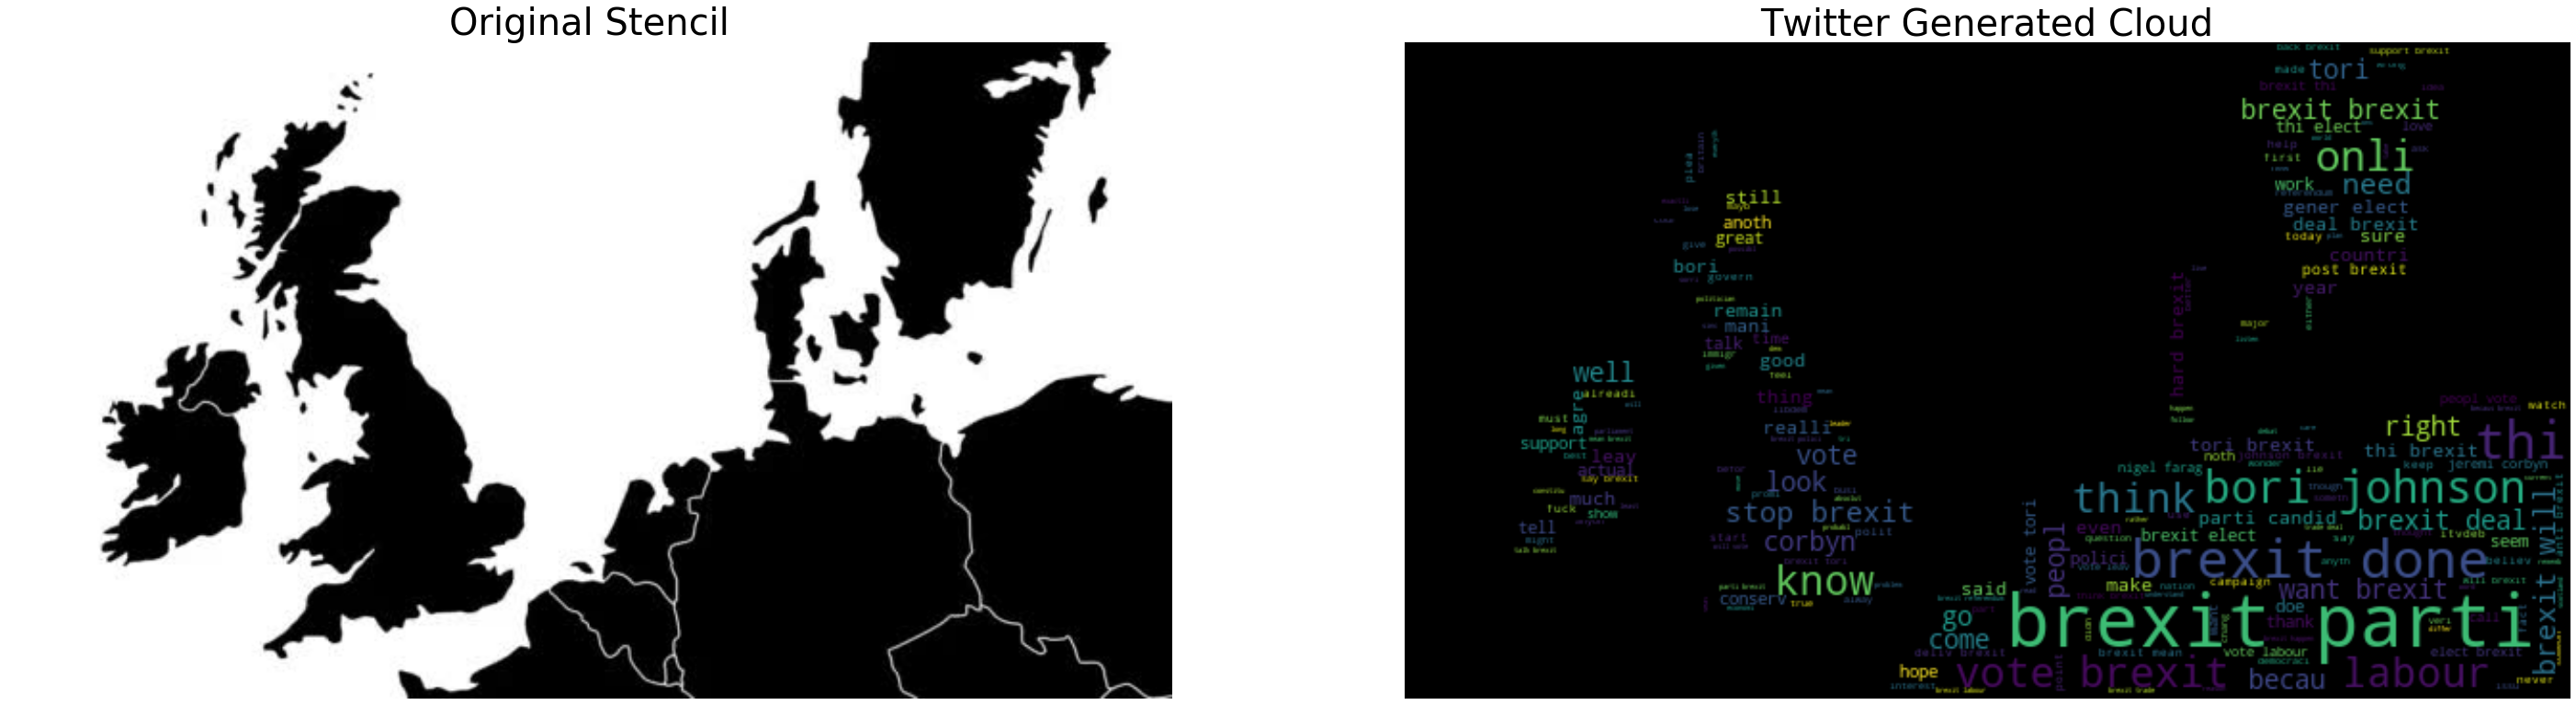

In [23]:
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im


from wordcloud import WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']])
mask = np.array(Image.open('g.jpg'))

wordcloud = WordCloud(background_color="black", mask=mask).generate(all_words)


f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")

f.add_subplot(1,2, 2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()





Twitter Generated Cloud in a bigger scale

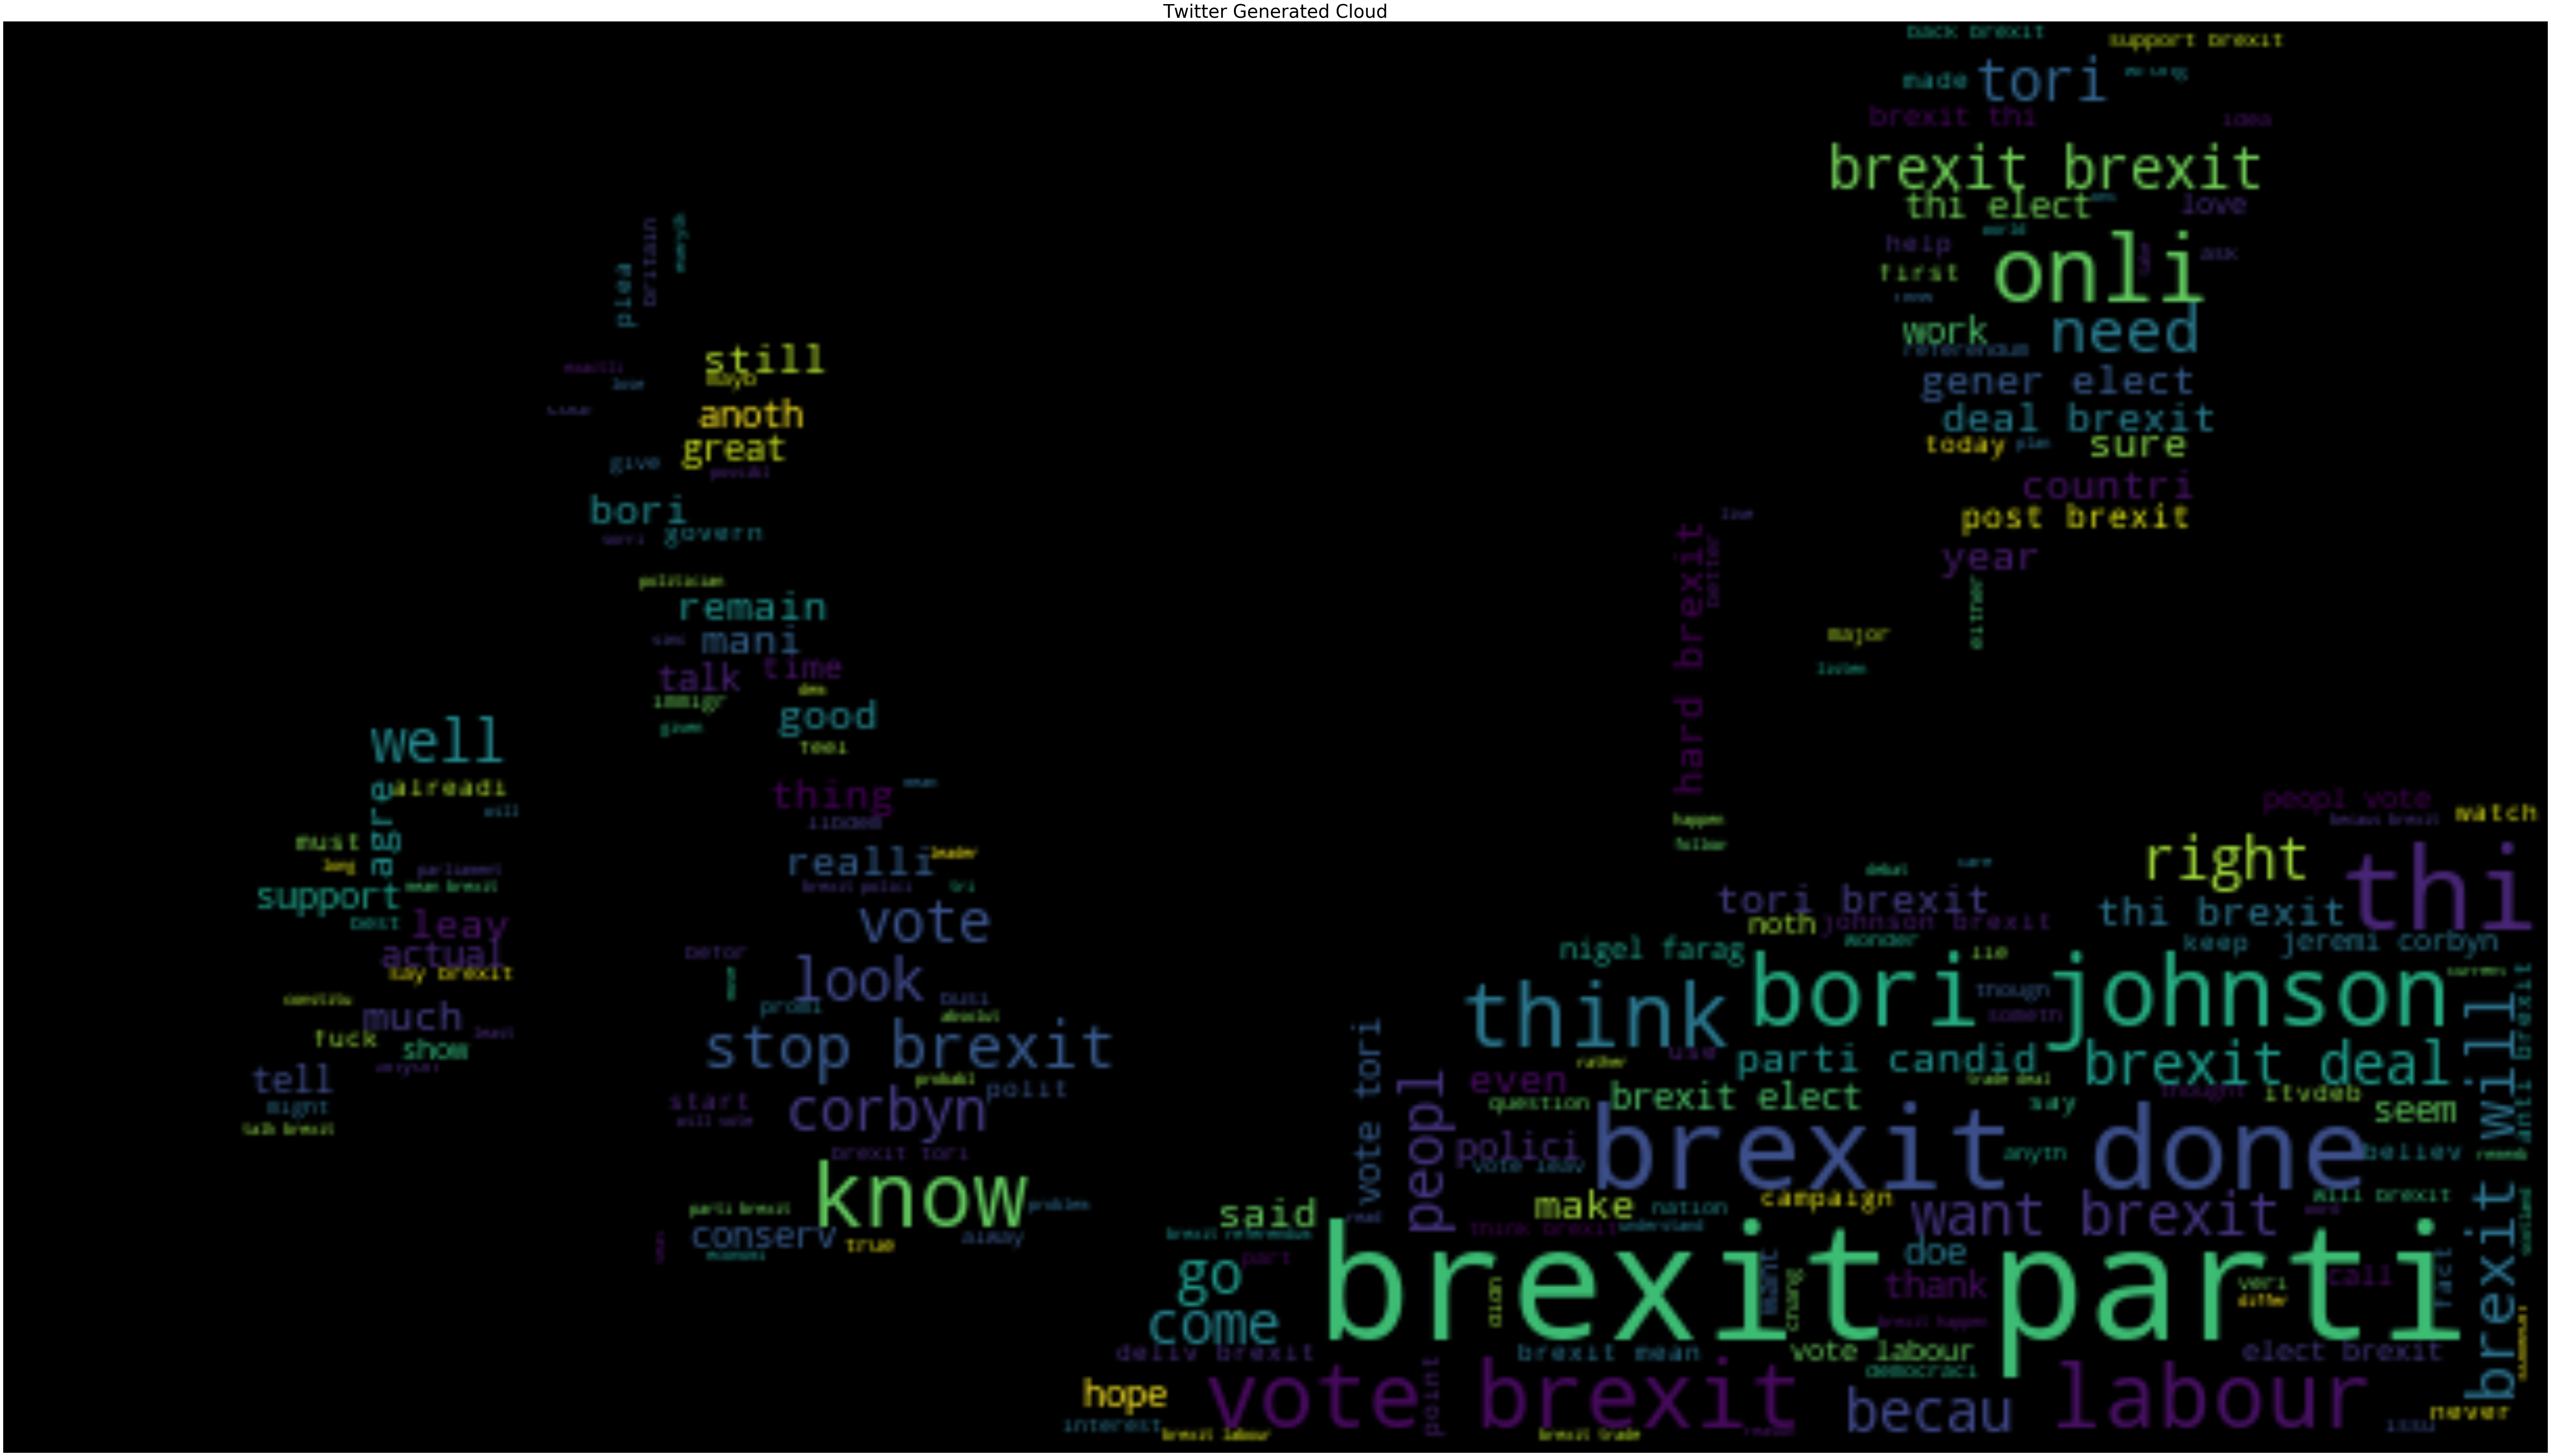

In [24]:

f = plt.figure(figsize=(100,100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

3.2  Understanding the impact of Hashtags on tweets sentiment

In [18]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [19]:
# extracting hashtags from tweets

HT_regular = hashtag_extract(combi['tidy_tweet'])

# unnesting list
HT_regular = sum(HT_regular,[])


3.3 Bar Plot

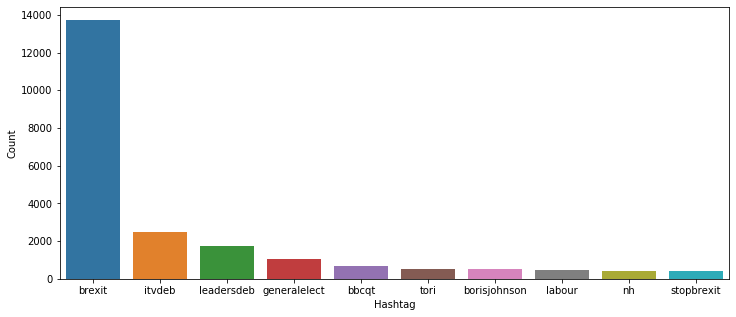

In [20]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(12,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

3.4 Bar Plot 2

In [22]:
import seaborn as sns
import ipywidgets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10)
@ipywidgets.interact
def plot(color=['red','steelblue']):
         (sns.barplot(y='Hashtag',
             x='Count',
             data=d,
             orient='h',
             color=color)
 .set_title('Bar Plot'))
    

interactive(children=(Dropdown(description='color', options=('red', 'steelblue'), value='red'), Output()), _do…

Storing the Hashtag into a CSV

In [21]:
import csv
from itertools import zip_longest
#list1 = [(a.keys())]
#list2 = [(a.values())]
d = [(a.keys()),(a.values())]
export_data = zip_longest(*d, fillvalue = '\t')
with open('word.csv', 'w', encoding="ISO-8859-1", newline='\n') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Word", "Word_Count"))
      wr.writerows(export_data)
myfile.close()